In [2]:
!pip install capymoa

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 34.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8996af7e0809d0ac1486d81057d01bb2a1cb794b781c7f2ae5fe9dcab9364d17
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


SGDClassifier cumulative accuracy: 74.380


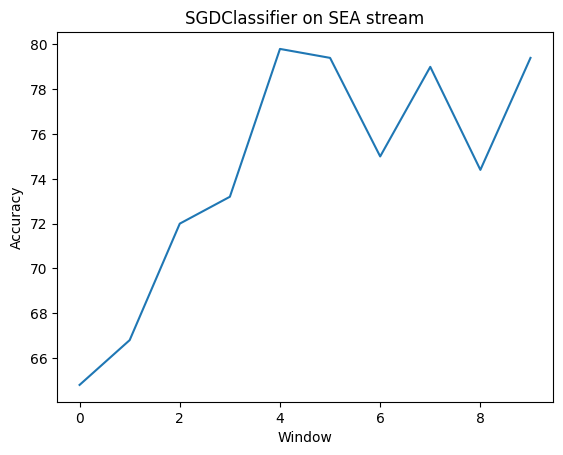

In [5]:
# This notebook is used to learn to apply sklearn models in capyMOA
from capymoa.base import SKClassifier
from capymoa.stream.generator import SEA
from capymoa.evaluation import prequential_evaluation
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

# 1. Create the SEA stream
stream = SEA(instance_random_seed=42)

# 2. Wrap incremental sklearn learner
learner = SKClassifier(schema=stream.schema, sklearner=SGDClassifier(loss="log_loss"))

# 3. Run prequential evaluation
results_sgd = prequential_evaluation(
    stream=stream,
    learner=learner,
    window_size=500,   # compute metrics every 500 instances
    max_instances=5000 # limit to 5000 for speed
)

# 4. Print cumulative accuracy
print(f"SGDClassifier cumulative accuracy: {results_sgd.cumulative.accuracy():.3f}")

# 5. Plot windowed accuracy
df = results_sgd.windowed.metrics_per_window()
df["accuracy"].plot()
plt.xlabel("Window")
plt.ylabel("Accuracy")
plt.title("SGDClassifier on SEA stream")
plt.show()


SGD final accuracy = 74.380
Perceptron final accuracy = 71.080
PA final accuracy = 70.220


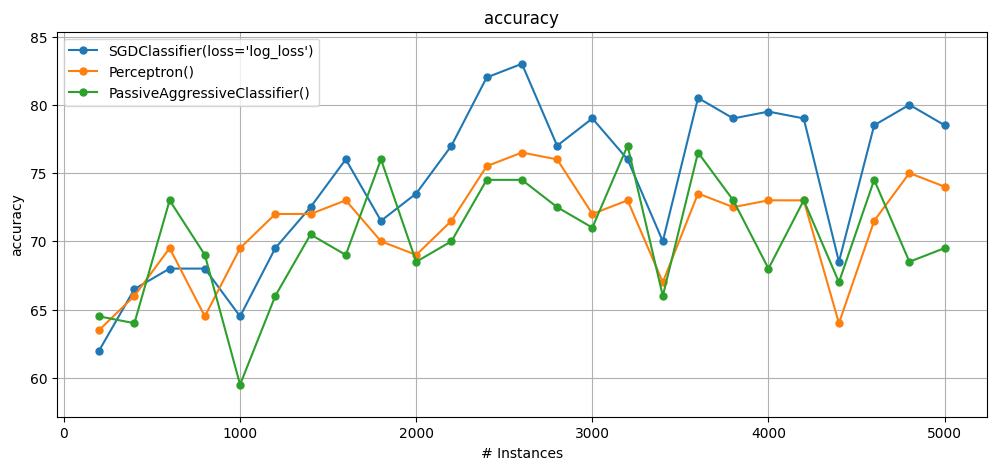

In [9]:
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier
from capymoa.evaluation import prequential_evaluation_multiple_learners
from capymoa.evaluation.visualization import plot_windowed_results

learners = {
    "SGD": SKClassifier(schema=stream.schema, sklearner=SGDClassifier(loss="log_loss")),
    "Perceptron": SKClassifier(schema=stream.schema, sklearner=Perceptron()),
    "PA": SKClassifier(schema=stream.schema, sklearner=PassiveAggressiveClassifier())
}


N=5000
results = prequential_evaluation_multiple_learners(
    stream,
    learners,
    window_size=200,
    max_instances=N
)

for name in learners.keys():
    print(f"{name} final accuracy = {results[name].cumulative.accuracy():.3f}")

plot_windowed_results(*[results[name] for name in learners.keys()], metric="accuracy")
plt.show()
